# PROJECT: DEEP LEARNING BASED RECOMMENDER SYSTEM (Autoencoder)

### Objective: Recommend movies to users based on their preferences and similarities with other users.



## Step 1: Data Loading and Preprocessing

In [1]:
import pandas as pd
import numpy as np

In [2]:
rating_df=pd.read_table(r"C:\Users\ATHIRA S\Downloads\ml-1m\ml-1m\ratings.dat", delimiter="::",engine='python', header=None, names=["UserID", "MovieID", "Rating", "Timestamp"])
rating_df.head()

,UserID,MovieID,Rating,Timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


In [3]:
rating_df.shape

(1000209, 4)

In [4]:
rating_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000209 entries, 0 to 1000208
Data columns (total 4 columns):
 #   Column     Non-Null Count    Dtype
---  ------     --------------    -----
 0   UserID     1000209 non-null  int64
 1   MovieID    1000209 non-null  int64
 2   Rating     1000209 non-null  int64
 3   Timestamp  1000209 non-null  int64
dtypes: int64(4)
memory usage: 30.5 MB


#### Features
- UserID: Unique user id
- MovieID: Unique movie id
- Rating: The rating given to movie by the user
- Timestamp: Evaluation Time

In [5]:
rating_df.duplicated().sum()

0

In [6]:
rating_df.isna().sum()

UserID       0
MovieID      0
Rating       0
Timestamp    0
dtype: int64

In [7]:
users=rating_df['UserID'].nunique()
print(f'No: of unique users are {users}')

No: of unique users are 6040


In [8]:
movies=rating_df['MovieID'].nunique()
print(f'No: of unique movies are {movies}')

No: of unique movies are 3706


In [10]:
movie_df=pd.read_table(r"C:\Users\ATHIRA S\Downloads\ml-1m\ml-1m\movies.dat",delimiter='::',engine='python',header=None,encoding='latin-1',names=["MovieID",'Title','genres'])

In [11]:
movie_df.head()

,MovieID,Title,genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [12]:
movie_df.shape

(3883, 3)

In [13]:
movie_df.duplicated().sum()

0

In [73]:
movie_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3883 entries, 0 to 3882
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   MovieID  3883 non-null   int64 
 1   Title    3883 non-null   object
 2   genres   3883 non-null   object
dtypes: int64(1), object(2)
memory usage: 91.1+ KB


#### Features
- MovieID- Unique move id
- Title- title of the movie
- genres- genres to which the movie belongs

In [14]:
meta_df=rating_df.merge(movie_df,on='MovieID')
meta_df.head()

,UserID,MovieID,Rating,Timestamp,Title,genres
0,1,1193,5,978300760,One Flew Over the Cuckoo's Nest (1975),Drama
1,2,1193,5,978298413,One Flew Over the Cuckoo's Nest (1975),Drama
2,12,1193,4,978220179,One Flew Over the Cuckoo's Nest (1975),Drama
3,15,1193,4,978199279,One Flew Over the Cuckoo's Nest (1975),Drama
4,17,1193,5,978158471,One Flew Over the Cuckoo's Nest (1975),Drama


In [15]:
meta_df['year']=meta_df['Title'].str.extract('(\d{4})', expand=False)

In [16]:
meta_df.head()

,UserID,MovieID,Rating,Timestamp,Title,genres,year
0,1,1193,5,978300760,One Flew Over the Cuckoo's Nest (1975),Drama,1975
1,2,1193,5,978298413,One Flew Over the Cuckoo's Nest (1975),Drama,1975
2,12,1193,4,978220179,One Flew Over the Cuckoo's Nest (1975),Drama,1975
3,15,1193,4,978199279,One Flew Over the Cuckoo's Nest (1975),Drama,1975
4,17,1193,5,978158471,One Flew Over the Cuckoo's Nest (1975),Drama,1975


## Step 2: Exploartory Data Analysis (EDA)

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

#### Number of Ratings per User:

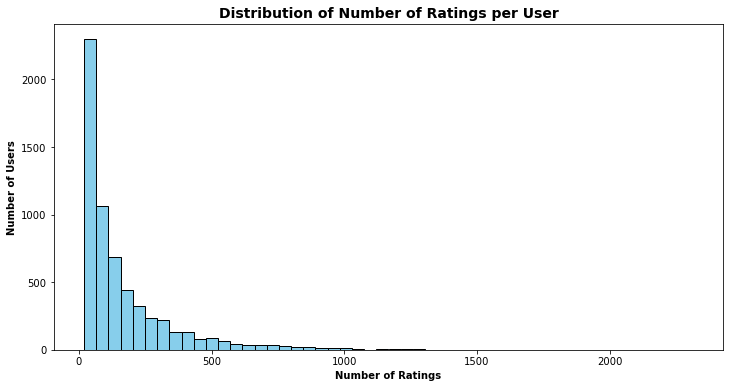

In [27]:
user_ratings_count = rating_df.groupby('UserID')['Rating'].count()
plt.figure(figsize=(12, 6))
plt.hist(user_ratings_count, bins=50, color='skyblue', edgecolor='black')
plt.title('Distribution of Number of Ratings per User',weight='bold',fontsize=14)
plt.xlabel('Number of Ratings',weight='bold')
plt.ylabel('Number of Users',weight='bold')
plt.show()

- Majority of users seem to have provided a relatively small number of ratings, indicating that many users might not rate a large number of movies.

#### Number of Ratings per Movie:

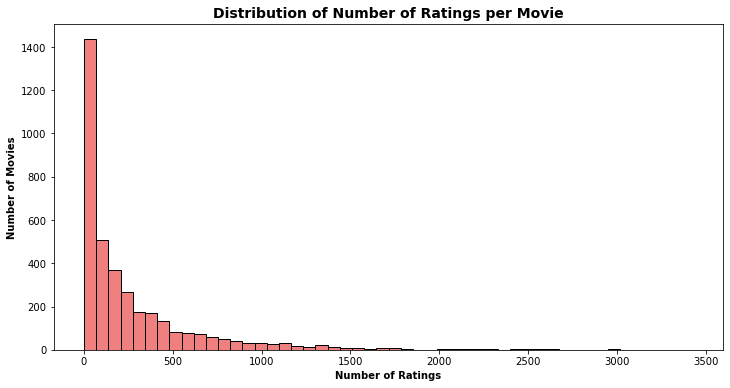

In [29]:
movie_ratings_count = rating_df.groupby('MovieID')['Rating'].count()
plt.figure(figsize=(12, 6))
plt.hist(movie_ratings_count, bins=50, color='lightcoral', edgecolor='black')
plt.title('Distribution of Number of Ratings per Movie',weight='bold',fontsize=14)
plt.xlabel('Number of Ratings',weight='bold',fontsize=10)
plt.ylabel('Number of Movies',weight='bold',fontsize=10)
plt.show()


- Most movies have a relatively low number of ratings, as indicated by the left side of the histogram.

In [30]:
meta_df['Total no of ratings']=meta_df.groupby(meta_df['MovieID'])['Rating'].transform('count')

In [31]:
meta_df.head()

,UserID,MovieID,Rating,Timestamp,Title,genres,year,movie_count in the year,Total no of ratings
0,1,1193,5,978300760,One Flew Over the Cuckoo's Nest (1975),Drama,1975,8486,1725
1,2,1193,5,978298413,One Flew Over the Cuckoo's Nest (1975),Drama,1975,8486,1725
2,12,1193,4,978220179,One Flew Over the Cuckoo's Nest (1975),Drama,1975,8486,1725
3,15,1193,4,978199279,One Flew Over the Cuckoo's Nest (1975),Drama,1975,8486,1725
4,17,1193,5,978158471,One Flew Over the Cuckoo's Nest (1975),Drama,1975,8486,1725


In [32]:
 meta_df=meta_df[meta_df['Total no of ratings']>25]

In [33]:
meta_df.shape

(992639, 9)

#### Number of Ratings:

Text(0, 0.5, 'count')

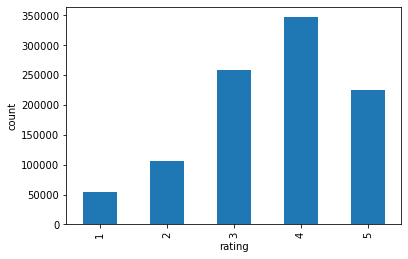

In [35]:
meta_df['Rating'].value_counts().sort_index().plot(kind='bar')
plt.xlabel('rating')
plt.ylabel('count')

- Most of the movies are rated 4 and then 3.

#### Distribution of Total Ratings:

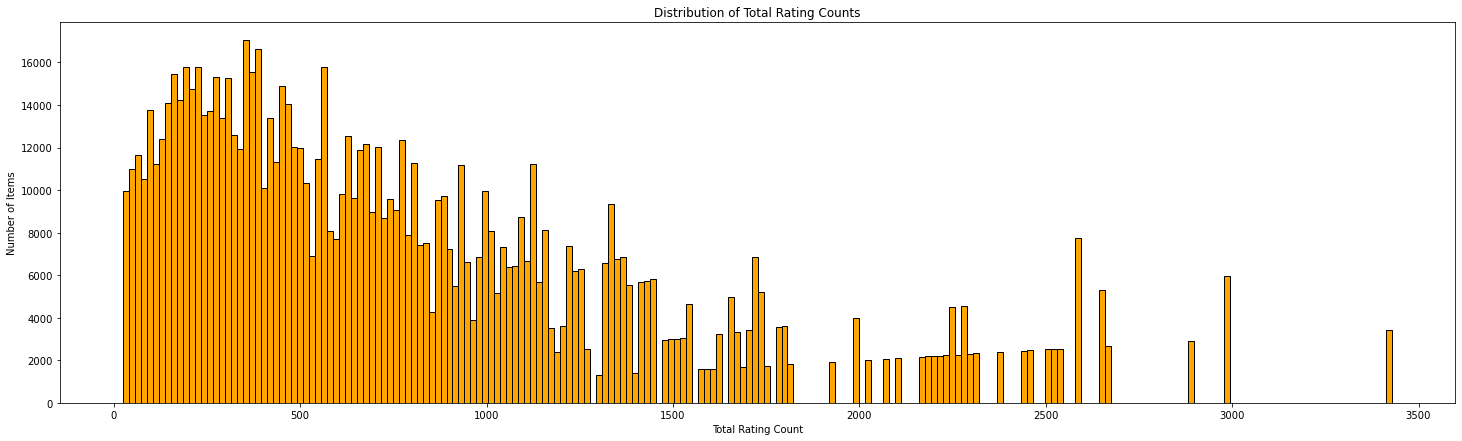

In [36]:
plt.figure(figsize=(25,7))
plt.hist(meta_df['Total no of ratings'],bins='auto',color='orange',edgecolor='black')
plt.title('Distribution of Total Rating Counts')
plt.xlabel('Total Rating Count')
plt.ylabel('Number of Items')
plt.show()

#### Average Rating per Movie:

In [37]:
average_ratings = rating_df.groupby('MovieID')['Rating'].mean()


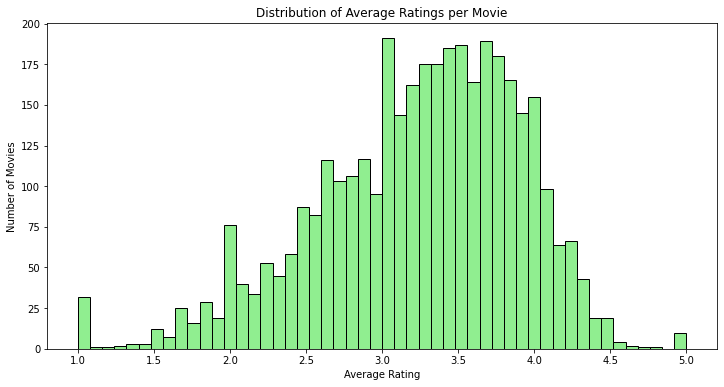

In [38]:
plt.figure(figsize=(12, 6))
plt.hist(average_ratings, bins=50, color='lightgreen', edgecolor='black')
plt.title('Distribution of Average Ratings per Movie')
plt.xlabel('Average Rating')
plt.ylabel('Number of Movies')
plt.show()

- There is a peak between 3 and 4, it suggests that many movies have an average rating around 3 to 4

In [39]:
highest_rated_movie = average_ratings.idxmax()
lowest_rated_movie = average_ratings.idxmin()

print(f'Highest Rated Movie (ID {highest_rated_movie}): {movie_df.loc[highest_rated_movie, "Title"]}')
print(f'Lowest Rated Movie (ID {lowest_rated_movie}): {movie_df.loc[lowest_rated_movie, "Title"]}')

Highest Rated Movie (ID 787): Old Lady Who Walked in the Sea, The (Vieille qui marchait dans la mer, La) (1991)
Lowest Rated Movie (ID 127): Pie in the Sky (1995)


#### Average Rating per User:

In [40]:
average_rating_per_user=rating_df.groupby(rating_df['UserID'])['Rating'].mean()

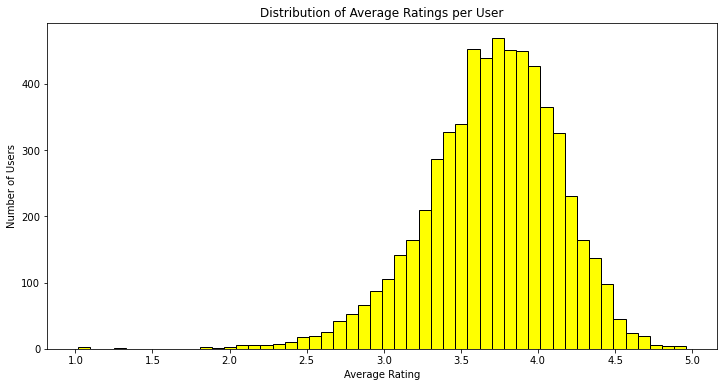

In [45]:
plt.figure(figsize=(12, 6))
plt.hist(average_rating_per_user, bins=50, color='yellow', edgecolor='black')
plt.title('Distribution of Average Ratings per User')
plt.xlabel('Average Rating')
plt.ylabel('Number of Users')
plt.show()

In [48]:
highest_rated_user = average_rating_per_user.idxmax()
lowest_rated_user = average_rating_per_user.idxmin()

print(f'Highest Rated User is (ID {highest_rated_user}): Average Rating = {average_rating_per_user[highest_rated_user]}')
print(f'Lowest Rated User is (ID {lowest_rated_user}): Average Rating = {average_rating_per_user[lowest_rated_user]}')

Highest Rated User is (ID 283): Average Rating = 4.962962962962963
Lowest Rated User is (ID 3598): Average Rating = 1.0153846153846153


In [63]:
genre_split=movie_df['genres'].str.get_dummies('|')
movie_df_with_genres=pd.concat([movie_df,genre_split],axis=1)
movie_df_with_genres.head()

,MovieID,Title,genres,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),Animation|Children's|Comedy,0,0,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,Jumanji (1995),Adventure|Children's|Fantasy,0,1,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,3,Grumpier Old Men (1995),Comedy|Romance,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
3,4,Waiting to Exhale (1995),Comedy|Drama,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Father of the Bride Part II (1995),Comedy,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [64]:
genre_sum=genre_split.sum()
genre_sum

Action          503
Adventure       283
Animation       105
Children's      251
Comedy         1200
Crime           211
Documentary     127
Drama          1603
Fantasy          68
Film-Noir        44
Horror          343
Musical         114
Mystery         106
Romance         471
Sci-Fi          276
Thriller        492
War             143
Western          68
dtype: int64

#### Distribution of movie genres:

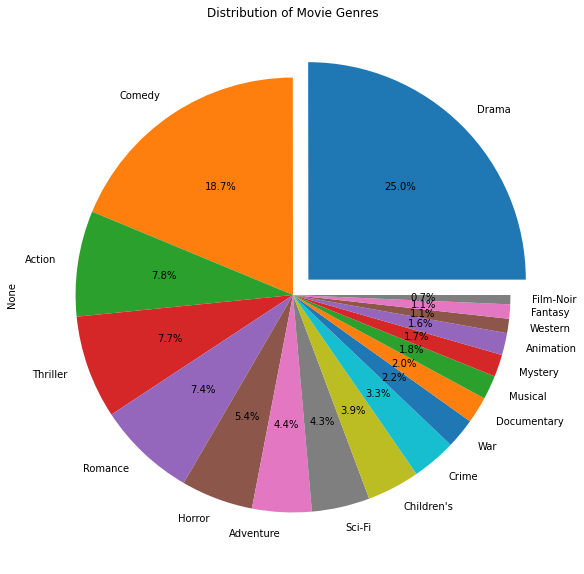

In [72]:
plt.figure(figsize=(14, 10))
genre_sum.sort_values(ascending=False).plot(kind='pie',explode=[0.1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],autopct='%1.1f%%')
plt.title('Distribution of Movie Genres')
plt.show()

- Most of the movies belongs to Comedy, Drama and Action.

## Step 3: Model Building and Evaluation

In [28]:
from sklearn.preprocessing import StandardScaler

In [29]:
std=StandardScaler()

In [30]:
rating_std=std.fit_transform(meta_df['Rating'].values.reshape(-1,1))

In [31]:
rating_array=rating_std.reshape(-1)

In [32]:
meta_df.loc[:,'norm_rating']=rating_array

In [33]:
meta_df.head()

,UserID,MovieID,Rating,Timestamp,Title,genres,Total no of ratings,norm_rating
0,1,1193,5,1970-01-01,One Flew Over the Cuckoo's Nest (1975),Drama,1725,1.268372
1,2,1193,5,1970-01-01,One Flew Over the Cuckoo's Nest (1975),Drama,1725,1.268372
2,12,1193,4,1970-01-01,One Flew Over the Cuckoo's Nest (1975),Drama,1725,0.371735
3,15,1193,4,1970-01-01,One Flew Over the Cuckoo's Nest (1975),Drama,1725,0.371735
4,17,1193,5,1970-01-01,One Flew Over the Cuckoo's Nest (1975),Drama,1725,1.268372


In [34]:
rating_matrix=pd.pivot_table(meta_df,values='norm_rating',index='UserID',columns='Title').fillna(0)
rating_matrix

Title,"$1,000,000 Duck (1971)",'Night Mother (1986),'Til There Was You (1997),"'burbs, The (1989)",...And Justice for All (1979),10 Things I Hate About You (1999),101 Dalmatians (1961),101 Dalmatians (1996),12 Angry Men (1957),"13th Warrior, The (1999)",...,Young Doctors in Love (1982),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Young Sherlock Holmes (1985),Your Friends and Neighbors (1998),"Zed & Two Noughts, A (1985)",Zero Effect (1998),eXistenZ (1999)
UserID,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,...,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000
2,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,...,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000
3,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,...,0.0,0.000000,1.268372,0.371735,0.0,0.000000,0.0,0.0,0.0,0.000000
4,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,...,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000
5,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,...,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6036,0.0,-0.524902,0.0,0.0,0.0,-1.421539,0.371735,0.0,0.000000,-2.318176,...,0.0,0.371735,0.000000,0.000000,0.0,-0.524902,0.0,0.0,0.0,-1.421539
6037,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.371735,0.000000,...,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000
6038,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,...,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000


In [35]:
from sklearn.model_selection import train_test_split

In [36]:
train_matrix,test_matrix=train_test_split(rating_matrix,test_size=0.2,random_state=68)

In [37]:
train_matrix.shape

(4832, 2915)

In [38]:
test_matrix.shape

(1208, 2915)

In [39]:
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model

In [40]:
input_size=train_matrix.shape[1]


In [41]:
input_layer=Input(shape=(input_size,))

In [42]:
encoded=Dense(100,activation='relu')(input_layer)
encoded=Dense(50,activation='relu')(encoded)
bottleneck=Dense(10,activation='relu')(encoded)


In [43]:
decoded=Dense(50,activation='relu')(bottleneck)
decoded=Dense(100,activation='relu')(decoded)
output_layer=Dense(input_size,activation='sigmoid')(decoded)

In [44]:
autoencoder=Model(input_layer,output_layer)

In [45]:
autoencoder.compile(optimizer='adam',loss='mean_squared_error')

In [46]:
autoencoder.fit(train_matrix,train_matrix,epochs=100,batch_size=32)

Epoch 1/100
151/151 [==============================] - 5s 20ms/step - loss: 0.0870
Epoch 2/100
151/151 [==============================] - 3s 18ms/step - loss: 0.0555
Epoch 3/100
151/151 [==============================] - 3s 19ms/step - loss: 0.0555
Epoch 4/100
151/151 [==============================] - 4s 27ms/step - loss: 0.0554
Epoch 5/100
151/151 [==============================] - 3s 22ms/step - loss: 0.0552
Epoch 6/100
151/151 [==============================] - 3s 19ms/step - loss: 0.0551
Epoch 7/100
151/151 [==============================] - 3s 20ms/step - loss: 0.0550
Epoch 8/100
151/151 [==============================] - 2s 16ms/step - loss: 0.0548
Epoch 9/100
151/151 [==============================] - 3s 18ms/step - loss: 0.0547
Epoch 10/100
151/151 [==============================] - 2s 16ms/step - loss: 0.0544
Epoch 11/100
151/151 [==============================] - 2s 15ms/step - loss: 0.0540
Epoch 12/100
151/151 [==============================] - 2s 16ms/step - loss: 0.0531
E

In [47]:
from sklearn.metrics import mean_squared_error

In [48]:
predictions=autoencoder.predict(test_matrix)

38/38 [==============================] - 0s 5ms/step


In [49]:
mse=mean_squared_error(test_matrix,predictions)

In [50]:
print(f'Mean Squared Error on Test Set: {mse}')


Mean Squared Error on Test Set: 0.05571772994045384


## Step 4: Making Recommendations for test set  

In [51]:
encoder_model = Model(inputs=autoencoder.input, outputs=autoencoder.layers[3].output)  
user_embeddings_train = encoder_model.predict(train_matrix)
user_embeddings_test = encoder_model.predict(test_matrix)


38/38 [==============================] - 0s 3ms/step


In [52]:
from sklearn.neighbors import NearestNeighbors

In [53]:
nn_model = NearestNeighbors(n_neighbors=10, metric='cosine')
nn_model.fit(user_embeddings_train)


NearestNeighbors(metric='cosine', n_neighbors=10)

In [54]:
distances, indices = nn_model.kneighbors(user_embeddings_test)


In [55]:
for i in range(len(test_matrix.index)):
    user_index = test_matrix.index[i]
    similar_users_indices = indices[i, 1:] 
    similar_users_ratings = train_matrix.iloc[similar_users_indices]
    recommended_movies = similar_users_ratings.mean(axis=0).sort_values(ascending=False).index[:5]
    print()
    print(f"\033[1m User {user_index} Recommendations:\033[0m")
    for r in recommended_movies:
        print(r)


 User 6022 Recommendations:
Star Wars: Episode IV - A New Hope (1977)
Matrix, The (1999)
Star Wars: Episode V - The Empire Strikes Back (1980)
Braveheart (1995)
Aliens (1986)

 User 389 Recommendations:
Saving Private Ryan (1998)
Matrix, The (1999)
Sixth Sense, The (1999)
Silence of the Lambs, The (1991)
Braveheart (1995)

 User 4819 Recommendations:
Star Wars: Episode V - The Empire Strikes Back (1980)
Star Wars: Episode IV - A New Hope (1977)
Wizard of Oz, The (1939)
Star Wars: Episode VI - Return of the Jedi (1983)
Raiders of the Lost Ark (1981)

 User 3978 Recommendations:
Apocalypse Now (1979)
Alien (1979)
Shining, The (1980)
Godfather, The (1972)
Aliens (1986)

 User 3965 Recommendations:
Godfather, The (1972)
Braveheart (1995)
Indiana Jones and the Last Crusade (1989)
Gladiator (2000)
Raiders of the Lost Ark (1981)

 User 4759 Recommendations:
Fargo (1996)
American Beauty (1999)
L.A. Confidential (1997)
Usual Suspects, The (1995)
Reservoir Dogs (1992)

 User 5562 Recommendation

## Step 5: Recommendation for a Specific User

In [56]:
from sklearn.metrics.pairwise import cosine_similarity

In [57]:
def get_recommendation_for_user(target_user_id):
    target_user_embedding=user_embeddings_test[target_user_id].reshape(1,-1)
    similarities=cosine_similarity(target_user_embedding,user_embeddings_train)
    similar_users_indices=np.argsort(similarities[0])[::-1][1:]
    recommended_movies=train_matrix.iloc[similar_users_indices].mean(axis=0).sort_values(ascending=False).index[:5]
    print(f"\033[1mRecommendations for User {target_user_id} are:\033[0m") 
    for i in recommended_movies:
        print(i)
    

In [58]:
get_recommendation_for_user(12)

Recommendations for User 12 are:
American Beauty (1999)
Star Wars: Episode IV - A New Hope (1977)
Raiders of the Lost Ark (1981)
Shawshank Redemption, The (1994)
Schindler's List (1993)
